## 1. Loading Dataset

In [ ]:
import pandas as pd
import numpy as np

# Read the csv file with a comma delimiter
df = pd.read_csv('IRIS.csv')

# Mencetak header data di 5 baris pertama pada file
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.insert(0, 'id', range(1, len(df) + 1))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
id,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df["species"].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## 2. Pemilihan Fitur

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['speciesEncoded'] = le.fit_transform(df['species'])

In [ ]:
# Fitur untuk Clustering
X = df.drop(["species", "speciesEncoded"], axis=1)

## 3. Menentukan Jumlah CLuster (K) dengan Elbow Method

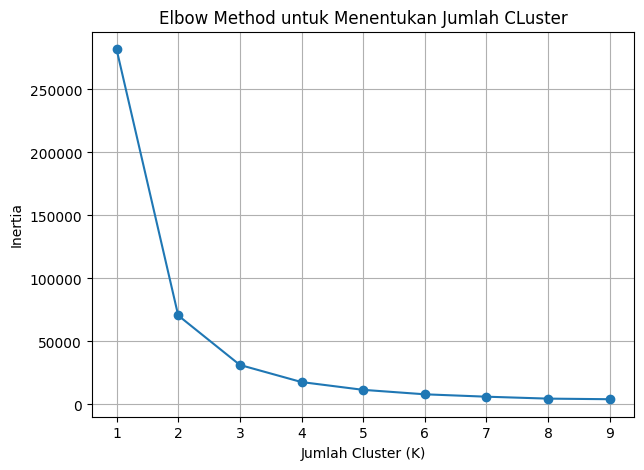

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah CLuster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## 4. Membangun Model K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=3,                     # Dataset IRIS terdiri dari 3 species
    init="k-means++",
    random_state=42
    )


In [ ]:
df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [2 0 1]


## 5. Evaluasi kualitas clustering

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n==== SILHOUETTE SCORE ====")
print("Silhouette Score:", sil_score)


==== SILHOUETTE SCORE ====
Silhouette Score: 0.5816702617893469


## 6. Confusion Matrix (Perbandingan dengan Label Asli)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n==== SILHOUETTE SCORE ====")
cm = confusion_matrix(df["speciesEncoded"], df["Cluster"])
print(cm)


==== SILHOUETTE SCORE ====
[[ 1  0 49]
 [49  1  0]
 [ 0 50  0]]


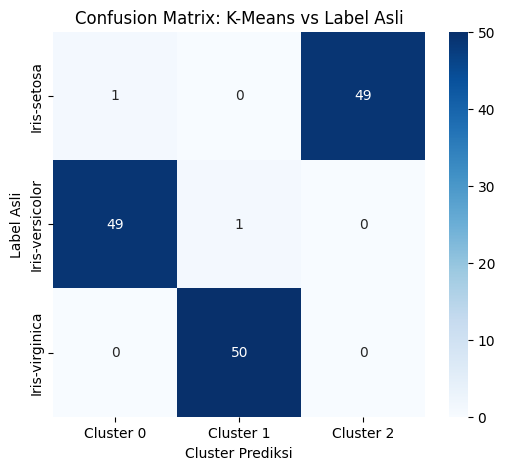

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
    yticklabels=le.classes_
    )
plt.title('Confusion Matrix: K-Means vs Label Asli')
plt.xlabel('Cluster Prediksi')
plt.ylabel('Label Asli')
plt.show()

## 7. 2D dan 3D Visualisasi Hasil Model K-Means

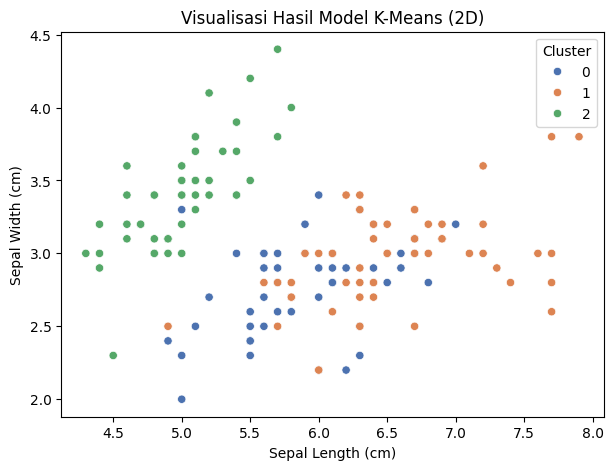

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df["sepal_length"],
    y=df["sepal_width"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title('Visualisasi Hasil Model K-Means (2D)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

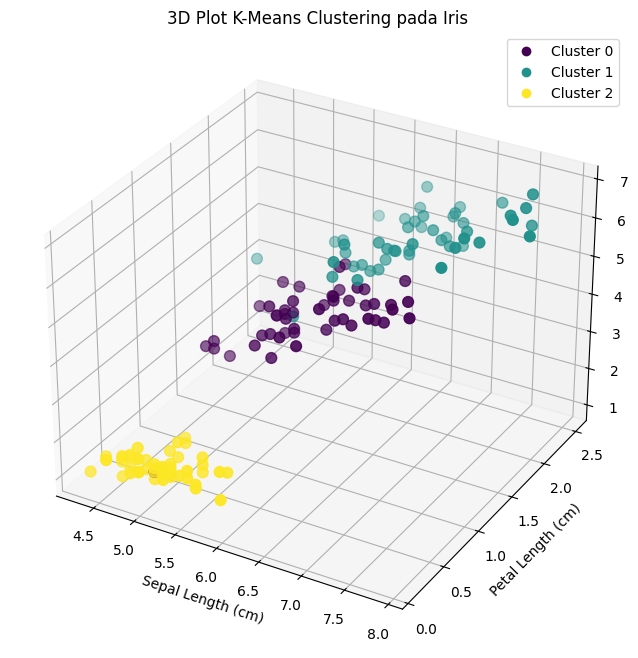

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["sepal_length"],
    df["petal_width"],
    df["petal_length"],
    c=df["Cluster"],
    s=60
)

ax.set_title('3D Plot K-Means Clustering pada Iris')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_ylabel('Petal Length (cm)')

# Legend Cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()